# Анализ вакансий Data Analyst и Data Scientist

Задача исследования - выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов Data Science размещенных на сервисе HH.ru

Нам даны два датасета, содержащие вакансии для аналитиков данных (DA) и специалистов Data Science (DS).


Описание данных для обоих датасетов:
- id - идентификатор вакансии;
- name - название вакансии;
- published_at - дата публикации;
- alternate_url - ссылка на страницу с вакансией;
- type - статус вакансии;
- employer - работодатель;
- department - отдел, в котором открыта вакансия;
- area - регион вакансии;
- experience - требуемый опыт работы;
- key_skills - ключевые навыки;
- schedule - режим работы;
- employment - тип занятости;
- description - описание вакансии;
- description_lemmatized - леммы (начальные форма слов), исходя из описания - вакансии (ключевые слова);
- salary_from - минимальная граница ЗП;
- salary_to - максимальная граница ЗП;
- salary_bin - вилка ЗП;
- key_skills_from_key_skills_field - перечень ключевых навыков;
- hard_skills_from_description - требуемые хард скиллы, исходя из описания вакансии;
- soft_skills_from_description - требуемые софт скиллы, исходя из описания вакансии;





План работы:
1. Изучение файлов и данных;
2. Предобработка данных;
3. Исследовательский анализ данных;
4. Определение важных навыков (скиллов) по грейдам опыта;
5. Определение типичного места работы для DA и DS;
6. Анализ динамики количества вакансий для DA и DS;
7. Выводы и рекомендации.

### 1 Изучение данных

In [ ]:
#подключение библиотек
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
import numpy as np

warnings.filterwarnings('ignore')

In [ ]:
data_ds = pd.read_excel('/content/drive/MyDrive/Проект/vacancies_ds.xlsx')
data_da = pd.read_excel('/content/drive/MyDrive/Проект/vacancies_da (2).xlsx')

Получим первичную информацию:

In [ ]:
data_ds.info()
data_ds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN
3,81857296,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857296,Открытая,Университет Иннополис,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов
4,81857358,Assistant Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857358,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Junior+ (1-3 years),"['Machine Learning', 'Public Speaking', 'Презе...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,Презентация результатов


In [ ]:
data_da.info()
data_da.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
3,86081569,Data analyst / Аналитик данных,2024-04-27 23:34:50,https://hh.ru/vacancy/86081569,Открытая,IQnergy,NaN,Москва,Middle (3-6 years),"['Pandas', 'Анализ данных']",Полный день,Полная занятость,за последние 2 года мы (iqnergy) выросли в 5 р...,последний 2 год iqnergy вырастать 5 помогать o...,NaN,NaN,ЗП не указана,Анализ данных,Pandas,NaN
4,87407185,"Senior Data Analyst ""Growth""",2024-04-02 17:03:10,https://hh.ru/vacancy/87407185,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'confluence', 'SQL', 'Python']",Полный день,Полная занятость,"обязанности: аналитика привлечения, лояльност...",обязанность аналитика привлечение лояльность о...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN


**Вывод:**
- в обоих датасетах одинаковый набор информации, все столбцы названы корректно;
- имеются пропуски в столбцах косающихся софт и хард скиллов;
- работодатели предпочитают не указывать ЗП, скорее всего ее согласовывают по результатам собеседования.

## 2 Предобработка данных

Введем столбец с датой публикацией вакансии и проверим оба датасета на дубликаты:

In [ ]:
data_da['published_date'] = data_da.published_at.dt.date

In [ ]:
data_ds['published_date'] = data_ds.published_at.dt.date

In [ ]:
data_da[
    data_da.duplicated(
        subset='id',
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date


In [ ]:
data_ds[
    data_ds.duplicated(
        subset='id',
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date


Поищем дубликаты среди одинаковых вакансий, но разных id:

In [ ]:
data_da[
    data_da.duplicated(
        subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date


In [ ]:
data_ds[
    data_ds.duplicated(
        subset=['name', 'published_date', 'employer', 'department', 'area', 'description'],
        keep=False
    )].sort_values(by=['name', 'employer', 'published_date'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,published_date


Дубликатов не обнаружено.

Посмотрим на названия вакансий по обоим направлениям:

In [ ]:
data_da['name'].value_counts()[:10]

name
Data Analyst                      61
Аналитик данных / Data Analyst    10
Data analyst                       9
Senior Data Analyst                8
Junior Data Analyst                7
Дата аналитик (Data Scientist)     6
Data analyst / Аналитик данных     4
Middle Data Analyst                4
Financial Data Analyst             3
Lead Data Analyst                  3
Name: count, dtype: int64

In [ ]:
data_da['name'].value_counts()[-10:]

name
Аналитик данных/Data Analyst                            1
BI-analyst \ Data analyst \ Аналитик данных (Senior)    1
Руководитель аналитики данных / Lead Data Analyst       1
Data analyst в направлении маркетинга                   1
Data analyst (BI-эксперт)                               1
Middle Дата Аналитик в продукт Travel (Big Data)        1
Data Analyst (remote)                                   1
Data analyst ( Мiddle/Middle+ )                         1
Руководитель дата аналитики                             1
Team Lead Data Analyst                                  1
Name: count, dtype: int64

In [ ]:
data_ds['name'].value_counts()[:10]

name
Data Scientist                                          91
Senior Data Scientist                                   20
Data scientist                                          16
Middle Data Scientist                                   11
Junior Data Scientist                                    7
Senior Data Scientist (NLP)                              7
Data Scientist (NLP)                                     6
Data Scientist (middle)                                  6
Data Scientist (Middle) с переездом в Южно-Сахалинск     6
Дата аналитик (Data Scientist)                           6
Name: count, dtype: int64

In [ ]:
data_ds['name'].value_counts()[-10:]

name
Data scientist (middle/senior)                                                                   1
Data Scientist (Deep Learning for Demand Forecast)                                               1
Data scientist/Data Analyst                                                                      1
Data scientist (CV+NLP)                                                                          1
Data Science Lead / Руководитель группы специалистов по машинному обучению и аналитике данных    1
Data Scientist in Petroleum Engineering                                                          1
Data Scientist in Geoscience (Аналитик данных - Геология)                                        1
Middle/Senior Data Scientist NLP/LLM                                                             1
Старший эксперт по анализу данных (data science, ML)                                             1
Data Scientist в VK Рекламу                                                                      1
Name:

Видим, что некоторые работодатели не разделяют понятия Data Scientist и Data Analyst...

Посмотрим на диапазон дат публикаций вакансий по двум направлениям:

In [ ]:
#аналитики
print(data_da['published_at'].min())
print(data_da['published_at'].max())


2024-03-06 08:13:00
2024-04-30 12:51:55


In [ ]:
#Data Scientist
print(data_ds['published_at'].min())
print(data_ds['published_at'].max())


2024-02-29 15:01:35
2024-04-30 11:41:03


В обоих датасетах представлены вакансии за март-апрель 2024 года.

Посмотрим на списки городов, где есть вакансии:

In [ ]:
data_da['area'].value_counts()[:15]

area
Москва                       240
Санкт-Петербург               37
Екатеринбург                   6
Новосибирск                    4
Краснодар                      3
Казань                         3
Ростов-на-Дону                 3
Владивосток                    2
Самара                         2
Нижний Новгород                1
Ступино                        1
Тюмень                         1
Томск                          1
Пермь                          1
Киров (Кировская область)      1
Name: count, dtype: int64

In [ ]:
data_ds['area'].value_counts()[:15]

area
Москва             513
Санкт-Петербург     66
Новосибирск         15
Нижний Новгород     15
Казань              12
Екатеринбург        11
Томск                4
Краснодар            4
Тюмень               3
Воронеж              3
Ижевск               2
Сочи                 2
Самара               2
Южно-Сахалинск       1
Калининград          1
Name: count, dtype: int64

Посмотрим на столбцы experience и schedule:

In [ ]:
print(data_da['experience'].unique())
print(data_ds['experience'].unique())

['Junior+ (1-3 years)' 'Middle (3-6 years)' 'Junior (no experince)'
 'Senior (6+ years)']
['Middle (3-6 years)' 'Junior+ (1-3 years)' 'Senior (6+ years)'
 'Junior (no experince)']


In [ ]:
print(data_da['schedule'].unique())
print(data_ds['schedule'].unique())

['Полный день' 'Удаленная работа' 'Гибкий график' 'Сменный график']
['Удаленная работа' 'Полный день' 'Гибкий график' 'Сменный график']


In [ ]:
print(data_da['employment'].unique())
print(data_ds['employment'].unique())

['Полная занятость' 'Частичная занятость']
['Полная занятость' 'Стажировка' 'Частичная занятость' 'Проектная работа']


Каких-либо аномалий не обнаружено.

Оценка скиллов. Начнем с аналитиков:

In [ ]:
# Создаем новую колонку 'skills_from_key_skills' в DataFrame 'vacancies'
# В этой колонке для каждой вакансии будет храниться уникальный набор навыков,
# приведенный к нижнему регистру
data_da['skills_from_key_skills'] = (
    data_da['key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
)

# Преобразуем колонку 'skills_from_key_skills' в список для дальнейшей обработки
skills_data = data_da['skills_from_key_skills'].to_list()

# Инициализируем словарь для подсчета частоты встречаемости каждого навыка
counter_da = {}

# Проходим по всем навыкам в списке 'skills_data'
for sequence in skills_data:
    # Разделяем строку с навыками на уникальные элементы и преобразуем в множество
    skills = set(sequence.split(', '))
    # Подсчитываем количество вхождений каждого навыка
    for skill in skills:
        counter_da[skill] = counter_da.get(skill, 0) + 1

# Фильтруем словарь 'counter_da', оставляя только те навыки, которые встречаются более 20 раз
counter_da = {k: v for k, v in counter_da.items() if v > 10}

# Сортируем словарь 'counter' по убыванию частоты встречаемости навыков
counter_da = dict(sorted(counter_da.items(), key=lambda item: item[1], reverse=True))

In [ ]:
counter_da

{'sql': 156,
 'python': 129,
 'pandas': 84,
 '': 61,
 'data analysis': 57,
 'анализ данных': 53,
 'документация': 45,
 'аналитическое мышление': 43,
 'power bi': 39,
 'коммуникация': 35,
 'confluence': 28,
 'big data': 26,
 'аналитика': 24,
 'a/b тесты': 23,
 'postgresql': 22,
 'tableau': 22,
 'математическая статистика': 21,
 'ms excel': 18,
 'работа с базами данных': 16,
 'clickhouse': 15,
 'ms sql': 15,
 'базы данных': 14,
 'работа с большим объемом информации': 13,
 'аналитические исследования': 13,
 'английский язык': 12,
 'airflow': 11,
 'юнит-экономика': 11}

In [ ]:
#удаление пустых ячеек
del counter_da['']

In [ ]:
SKILLS_da = set(counter_da.keys()).union({'excel', 'powerpoint', 'power bi'})

In [ ]:
def calc_skills_from_description(value: str) -> str:
    """
    Извлекает навыки из описания, используя заданный список навыков SKILLS.

    Функция проходит по словам в строке 'value', объединяет их в группы от одного до четырех слов,
    и если сочетание слов является навыком из списка SKILLS, добавляет его в результат.
    Результат возвращает в виде строки, где навыки разделены запятой.

    Parameters:
    value (str): Строка с описанием, из которой необходимо извлечь навыки.

    Returns:
    str: Строка с уникальными навыками, извлеченными из описания.
    """
    res = []  # Инициализация списка для хранения найденных навыков
    value = value.lower().split()  # Приведение строки к нижнему регистру и разделение на слова
    start = 0  # Начальный индекс для среза слов
    stop = 4  # Конечный индекс для среза слов

    # Пока конечный индекс не превысит количество слов в строке
    while stop <= len(value):
        skill = ' '.join(value[start:stop])  # Объединение слов в потенциальный навык
        if skill in SKILLS_da:  # Проверка, является ли сочетание слов навыком
            res.append(skill)  # Добавление навыка в результат
            start = stop  # Сдвиг начального индекса
            stop = start + 4  # Сдвиг конечного индекса
        else:
            # Уменьшение конечного индекса для проверки следующего сочетания слов
            if start < stop - 1:
                stop -= 1
            else:
                # Сдвиг начального индекса, если не найдено сочетаний
                start = stop
                stop = start + 4
    return ', '.join(set(res))  # Возврат строки с уникальными навыками

def calc_skills(row: dict) -> str:
    """
    Вычисляет итоговый набор навыков из двух полей строки DataFrame: 'skills_from_description' и 'skills_from_key_skills'.

    Если одно из полей пустое, возвращает значение другого поля. Если оба поля содержат значения,
    объединяет их в один уникальный набор навыков.

    Returns:
    str: Строка с уникальными навыками, полученными из обоих полей.
    """
    # Проверка и возврат навыков из описания, если поле с навыками из описания пусто
    if row['skills_from_description'] == '':
        return row['skills_from_key_skills']
    # Проверка и возврат навыков из ключевых слов, если поле с навыками из ключевых навыков пусто
    if row['skills_from_key_skills'] == '':
        return row['skills_from_description']
    # Объединение и возврат уникальных навыков из обоих полей
    return ', '.join(set(row['skills_from_description'].split(', ') + row['skills_from_key_skills'].split(', ')))

In [ ]:
data_da['skills_from_description'] = data_da['description_lemmatized'].map(calc_skills_from_description)
data_da['skills'] = data_da.apply(calc_skills, axis=1)

In [ ]:
def get_frequency_skill(experience: str) -> pd.DataFrame:
    """
    Вычисляет частоту встречаемости навыков для заданного типа вакансий и уровня опыта.

    Функция принимает тип вакансии и уровень опыта, а затем анализирует набор данных вакансий,
    чтобы определить, как часто каждый навык упоминается в соответствующих записях.

    Parameters:
    type_name (str): Тип вакансии, например 'da' для аналитиков данных.
    experience (str): Уровень опыта, например 'senior'.

    Returns:
    pd.DataFrame: DataFrame с топ-15 наиболее часто встречающимися навыками и их частотами.
    """

    # Словарь для подсчета частоты встречаемости навыков
    freq_skills = {}

    # Перебираем список навыков для заданного типа вакансий и уровня опыта
    for sequence in data_da[(data_da.experience == experience)].skills.to_list():
        skills = sequence.split(', ')
        if skills:
            for skill in skills:
                freq_skills[skill] = freq_skills.get(skill, 0) + 1

    # Объединяем частоты для синонимичных навыков
    freq_skills['excel'] = freq_skills.get('ms excel', 0) + freq_skills.get('excel', 0)
    freq_skills.pop('ms excel', None)

    freq_skills['power bi'] = freq_skills.get('ms power bi', 0) + freq_skills.get('power bi', 0)
    freq_skills.pop('ms power bi', None)

    freq_skills['powerpoint'] = freq_skills.get('ms powerpoint', 0) + freq_skills.get('powerpoint', 0)
    freq_skills.pop('ms powerpoint', None)

    freq_skills['spark'] = freq_skills.get('pyspark', 0) + freq_skills.get('spark', 0)
    freq_skills.pop('pyspark', None)

    # Удаляем слишком общие навыки
    freq_skills.pop('анализ данных', None)
    freq_skills.pop('machine learning', None)
    freq_skills.pop('ml', None)
    freq_skills.pop('data science', None)

    # Сортируем навыки по убыванию частоты встречаемости
    freq_skills = dict(sorted(freq_skills.items(), key=lambda item: item[1], reverse=True))

    # Ограничиваем список до топ-15 навыков
    skill = list(freq_skills.keys())[:15]
    freq = list(freq_skills.values())[:15]

    # Создаем DataFrame и сортируем его по частоте встречаемости
    return pd.DataFrame({'Скилл': skill, 'Частота встречаемости': freq}).sort_values(by='Частота встречаемости', ascending=False)

Для Data Science:

In [ ]:
# Создаем новую колонку 'skills_from_key_skills' в DataFrame 'vacancies'
# В этой колонке для каждой вакансии будет храниться уникальный набор навыков,
# приведенный к нижнему регистру
data_ds['skills_from_key_skills'] = (
    data_ds['key_skills'].map(
        lambda x: ', '.join(set([skill[1:-1] for skill in x[1:-1].lower().split(', ')])))
)

# Преобразуем колонку 'skills_from_key_skills' в список для дальнейшей обработки
skills_data = data_ds['skills_from_key_skills'].to_list()

# Инициализируем словарь для подсчета частоты встречаемости каждого навыка
counter_ds = {}

# Проходим по всем навыкам в списке 'skills_data'
for sequence in skills_data:
    # Разделяем строку с навыками на уникальные элементы и преобразуем в множество
    skills = set(sequence.split(', '))
    # Подсчитываем количество вхождений каждого навыка
    for skill in skills:
        counter_ds[skill] = counter_ds.get(skill, 0) + 1

# Фильтруем словарь 'counter_da', оставляя только те навыки, которые встречаются более 20 раз
counter_ds = {k: v for k, v in counter_ds.items() if v > 10}

# Сортируем словарь 'counter' по убыванию частоты встречаемости навыков
counter_ds = dict(sorted(counter_ds.items(), key=lambda item: item[1], reverse=True))

In [ ]:
counter_ds

{'python': 290,
 'pandas': 248,
 'sql': 176,
 '': 118,
 'документация': 110,
 'machine learning': 98,
 'ml': 79,
 'коммуникация': 72,
 'data science': 68,
 'confluence': 56,
 'pytorch': 53,
 'математическая статистика': 48,
 'юнит-экономика': 47,
 'big data': 46,
 'nlp': 46,
 'анализ данных': 43,
 'numpy': 36,
 'data analysis': 36,
 'spark': 35,
 'git': 33,
 'машинное обучение': 32,
 'аналитическое мышление': 31,
 'hadoop': 28,
 'математическое моделирование': 27,
 'linux': 26,
 'статистический анализ': 24,
 'docker': 24,
 'deep learning': 21,
 'английский язык': 21,
 'математический анализ': 20,
 'tensorflow': 19,
 'ms sql': 19,
 'postgresql': 18,
 'mlflow': 17,
 'it': 15,
 'data mining': 14,
 'computer vision': 14,
 'clickhouse': 13,
 'hive': 13,
 'airflow': 13,
 'работа в команде': 12,
 'sklearn': 11,
 'etl': 11,
 'scikit-learn': 11,
 'работа с базами данных': 11}

In [ ]:
#удаление пустых ячеек
del counter_ds['']

In [ ]:
SKILLS_ds = set(counter_ds.keys()).union({'excel', 'powerpoint', 'power bi'})

In [ ]:
def calc_skills_from_description_ds(value: str) -> str:
    """
    Извлекает навыки из описания, используя заданный список навыков SKILLS.

    Функция проходит по словам в строке 'value', объединяет их в группы от одного до четырех слов,
    и если сочетание слов является навыком из списка SKILLS_ds, добавляет его в результат.
    Результат возвращает в виде строки, где навыки разделены запятой.

    Parameters:
    value (str): Строка с описанием, из которой необходимо извлечь навыки.

    Returns:
    str: Строка с уникальными навыками, извлеченными из описания.
    """
    res = []  # Инициализация списка для хранения найденных навыков
    value = value.lower().split()  # Приведение строки к нижнему регистру и разделение на слова
    start = 0  # Начальный индекс для среза слов
    stop = 4  # Конечный индекс для среза слов

    # Пока конечный индекс не превысит количество слов в строке
    while stop <= len(value):
        skill = ' '.join(value[start:stop])  # Объединение слов в потенциальный навык
        if skill in SKILLS_ds:  # Проверка, является ли сочетание слов навыком
            res.append(skill)  # Добавление навыка в результат
            start = stop  # Сдвиг начального индекса
            stop = start + 4  # Сдвиг конечного индекса
        else:
            # Уменьшение конечного индекса для проверки следующего сочетания слов
            if start < stop - 1:
                stop -= 1
            else:
                # Сдвиг начального индекса, если не найдено сочетаний
                start = stop
                stop = start + 4
    return ', '.join(set(res))  # Возврат строки с уникальными навыками

def calc_skills_ds(row: dict) -> str:
    """
    Вычисляет итоговый набор навыков из двух полей строки DataFrame: 'skills_from_description' и 'skills_from_key_skills'.

    Если одно из полей пустое, возвращает значение другого поля. Если оба поля содержат значения,
    объединяет их в один уникальный набор навыков.

    Returns:
    str: Строка с уникальными навыками, полученными из обоих полей.
    """
    # Проверка и возврат навыков из описания, если поле с навыками из описания пусто
    if row['skills_from_description'] == '':
        return row['skills_from_key_skills']
    # Проверка и возврат навыков из ключевых слов, если поле с навыками из ключевых навыков пусто
    if row['skills_from_key_skills'] == '':
        return row['skills_from_description']
    # Объединение и возврат уникальных навыков из обоих полей
    return ', '.join(set(row['skills_from_description'].split(', ') + row['skills_from_key_skills'].split(', ')))

In [ ]:
data_ds['skills_from_description'] = data_ds['description_lemmatized'].map(calc_skills_from_description_ds)
data_ds['skills'] = data_ds.apply(calc_skills_ds, axis=1)

In [ ]:
def get_frequency_skill_ds(experience: str) -> pd.DataFrame:
    """
    Вычисляет частоту встречаемости навыков для заданного типа вакансий и уровня опыта.

    Функция принимает тип вакансии и уровень опыта, а затем анализирует набор данных вакансий,
    чтобы определить, как часто каждый навык упоминается в соответствующих записях.

    Parameters:
    type_name (str): Тип вакансии, например 'da' для аналитиков данных.
    experience (str): Уровень опыта, например 'senior'.

    Returns:
    pd.DataFrame: DataFrame с топ-15 наиболее часто встречающимися навыками и их частотами.
    """

    # Словарь для подсчета частоты встречаемости навыков
    freq_skills = {}

    # Перебираем список навыков для заданного типа вакансий и уровня опыта
    for sequence in data_ds[(data_ds.experience == experience)].skills.to_list():
        skills = sequence.split(', ')
        if skills:
            for skill in skills:
                freq_skills[skill] = freq_skills.get(skill, 0) + 1

    # Объединяем частоты для синонимичных навыков
    freq_skills['excel'] = freq_skills.get('ms excel', 0) + freq_skills.get('excel', 0)
    freq_skills.pop('ms excel', None)

    freq_skills['power bi'] = freq_skills.get('ms power bi', 0) + freq_skills.get('power bi', 0)
    freq_skills.pop('ms power bi', None)

    freq_skills['powerpoint'] = freq_skills.get('ms powerpoint', 0) + freq_skills.get('powerpoint', 0)
    freq_skills.pop('ms powerpoint', None)

    freq_skills['spark'] = freq_skills.get('pyspark', 0) + freq_skills.get('spark', 0)
    freq_skills.pop('pyspark', None)

    # Удаляем слишком общие навыки
    freq_skills.pop('анализ данных', None)
    freq_skills.pop('machine learning', None)
    freq_skills.pop('ml', None)
    freq_skills.pop('data science', None)

    # Сортируем навыки по убыванию частоты встречаемости
    freq_skills = dict(sorted(freq_skills.items(), key=lambda item: item[1], reverse=True))

    # Ограничиваем список до топ-15 навыков
    skill = list(freq_skills.keys())[:15]
    freq = list(freq_skills.values())[:15]

    # Создаем DataFrame и сортируем его по частоте встречаемости
    return pd.DataFrame({'Скилл': skill, 'Частота встречаемости': freq}).sort_values(by='Частота встречаемости', ascending=False)

Заполним, по возможности, столбцы с диапазоном зарплат, используя имеющиеся данные из столбцов salary_to и salary_from:

In [ ]:
def calc_salary_num(row: pd.Series) -> float:
    """
    Вычисляет среднее значение зарплаты на основе верхнего и нижнего порогов.

    Функция принимает строку DataFrame, содержащую информацию о зарплатных предложениях
    (salary_to и salary_from), и возвращает среднее значение, если указаны оба порога,
    или одно из значений, если указан только один порог.

    Parameters:
    row (pd.Series): Строка DataFrame, содержащая информацию о зарплатных предложениях.

    Returns:
    float: Среднее значение зарплаты или один из указанных порогов.
    """

    # Проверяем, указаны ли оба порога зарплаты, и если да, возвращаем их среднее
    if not row.isna()['salary_to'] and not row.isna()['salary_from']:
        return (row['salary_to'] + row['salary_from']) / 2

    # Возвращаем верхний порог зарплаты, если он указан
    if not row.isna()['salary_to']:
        return row['salary_to']

    # Возвращаем нижний порог зарплаты, если он указан
    if not row.isna()['salary_from']:
        return row['salary_from']

In [ ]:
data_da['salary_num'] = data_da.apply(calc_salary_num, axis=1)

In [ ]:
data_ds['salary_num'] = data_ds.apply(calc_salary_num, axis=1)

In [ ]:
def calc_salary_bin(row: pd.Series) -> str:
    """
    Категоризирует зарплатные предложения вакансий по их размеру.

    Функция принимает строку DataFrame, содержащую информацию о зарплате (salary_to и salary_from),
    и возвращает категорию зарплаты в зависимости от указанных значений.

    Parameters:
    row (pd.Series): Строка DataFrame, содержащая информацию о зарплатных предложениях.

    Returns:
    str: Категория зарплаты.
    """

    # Проверяем отсутствие данных о зарплате
    if row.isna()['salary_num']:
        return 'ЗП не указана'

    # Категоризируем зарплату
    else:
        if row['salary_num'] > 300000:
            return 'Больше 300 тысяч'
        if row['salary_num'] > 200000:
            return 'От 200 тысяч до 300 тысяч'
        if row['salary_num'] > 100000:
            return 'От 100 тысяч до 200 тысяч'
        else:
            return 'Меньше 100 тысяч'

In [ ]:
data_da['salary_bin'] = data_da.apply(calc_salary_bin, axis=1)

In [ ]:
data_ds['salary_bin'] = data_ds.apply(calc_salary_bin, axis=1)

**Вывод:** На этапе предобработки проверили датасеты на наличие дубликатов, добавили функции для распределения скиллов, исходя из описания и требуемого опыта. Также добавили функция для заполнения столбца с вилкой ЗП.

## 3 Исследовательский анализ

Оценим доли грейдов среди вакансий аналитиков и Data Scientist:

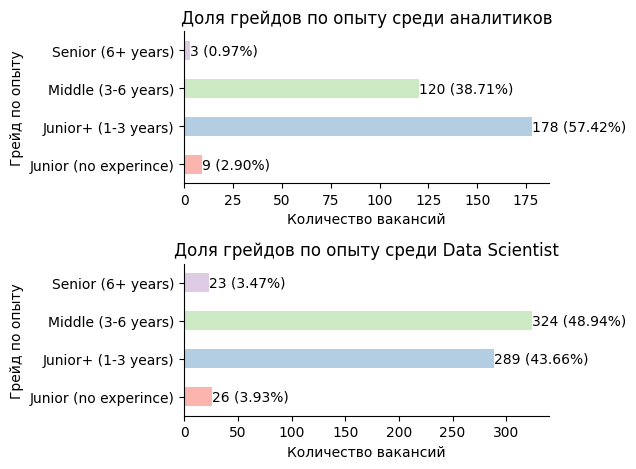

In [ ]:
colors = sns.color_palette('Pastel1')

plt.subplot(2, 1, 1)
counts_da = data_da.groupby('experience').size()
percentages_da = counts_da / counts_da.sum() * 100
counts_da.plot(kind='barh', color=colors)
for i, val in enumerate(counts_da):
    plt.text(val, i, f'{val} ({percentages_da[i]:.2f}%)', va='center')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Доля грейдов по опыту среди аналитиков')
plt.xlabel('Количество вакансий')
plt.ylabel('Грейд по опыту')

# Построение второго графика
plt.subplot(2, 1, 2)
counts_ds = data_ds.groupby('experience').size()
percentages_ds = counts_ds / counts_ds.sum() * 100
counts_ds.plot(kind='barh', color=colors)
for i, val in enumerate(counts_ds):
    plt.text(val, i, f'{val} ({percentages_ds[i]:.2f}%)', va='center')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Доля грейдов по опыту среди Data Scientist')
plt.xlabel('Количество вакансий')
plt.ylabel('Грейд по опыту')

plt.tight_layout()
plt.show()

Для обоих направлений есть потребность в специалистах уровня Junior+ (1-3 years) и Middle (3-6 years). Потребность в Junior (no experince) и Senior (6+ years) минимальна. Скорее всего это связяно с логикой "Первых учить и растить долго и дорого, а Senior проще из Middle получить".

В связи с таким распределением, делать обширные выводы по полученным результатам для позиций Junior и Senior нецелесообразно.

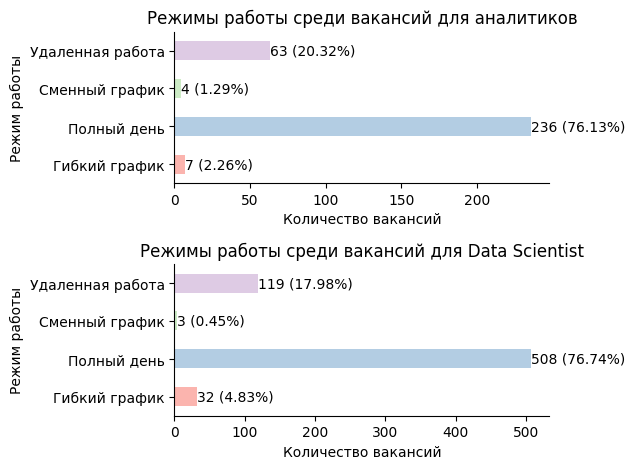

In [ ]:
colors = sns.color_palette('Pastel1')

plt.subplot(2, 1, 1)
counts_da = data_da.groupby('schedule').size()
percentages_da = counts_da / counts_da.sum() * 100
counts_da.plot(kind='barh', color=colors)
for i, val in enumerate(counts_da):
    plt.text(val, i, f'{val} ({percentages_da[i]:.2f}%)', va='center')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Режимы работы среди вакансий для аналитиков')
plt.xlabel('Количество вакансий')
plt.ylabel('Режим работы')

# Построение второго графика
plt.subplot(2, 1, 2)
counts_ds = data_ds.groupby('schedule').size()
percentages_ds = counts_ds / counts_ds.sum() * 100
counts_ds.plot(kind='barh', color=colors)
for i, val in enumerate(counts_ds):
    plt.text(val, i, f'{val} ({percentages_ds[i]:.2f}%)', va='center')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Режимы работы среди вакансий для Data Scientist')
plt.xlabel('Количество вакансий')
plt.ylabel('Режим работы')

plt.tight_layout()
plt.show()

Большая часть вакансий подразумевает занятость на полный день, некоторые - с возможностью удаленки.

Распределение вакансий по городам:

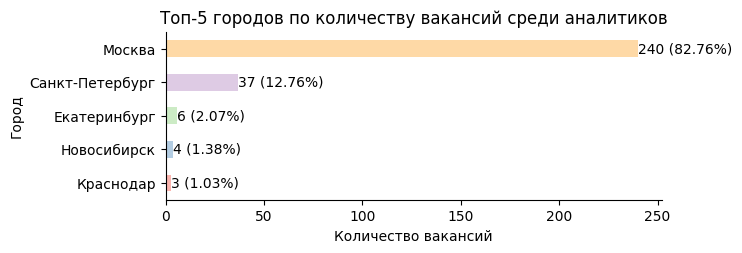

In [ ]:
#топ-5 городов
top_areas = data_da['area'].value_counts().head(5).sort_values(ascending=True)

plt.subplot(2, 1, 1)
counts_da = top_areas
percentages_da = counts_da / counts_da.sum() * 100

colors = sns.color_palette('Pastel1')
counts_da.plot(kind='barh', color=colors)
for i, val in enumerate(counts_da):
    plt.text(val, i, f'{val} ({percentages_da[i]:.2f}%)', va='center')


plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Топ-5 городов по количеству вакансий среди аналитиков')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.show()

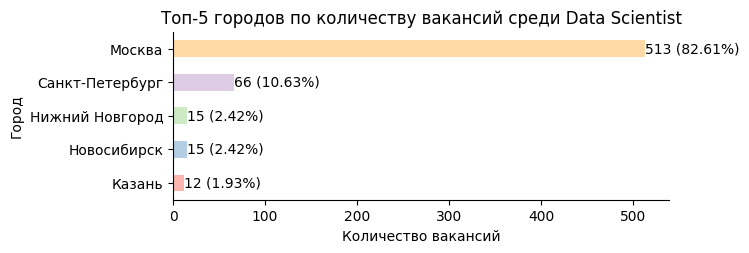

In [ ]:
#топ-5 городов
top_areas_ds = data_ds['area'].value_counts().head(5).sort_values(ascending=True)

plt.subplot(2, 1, 1)
counts_ds = top_areas_ds
percentages_ds = counts_ds / counts_ds.sum() * 100

colors = sns.color_palette('Pastel1')
counts_ds.plot(kind='barh', color=colors)
for i, val in enumerate(counts_ds):
    plt.text(val, i, f'{val} ({percentages_ds[i]:.2f}%)', va='center')


plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Топ-5 городов по количеству вакансий среди Data Scientist')
plt.xlabel('Количество вакансий')
plt.ylabel('Город')
plt.show()

Абсолютное большинство вакансий в городе Москва, что неудивительно при огромной централизации всего в РФ.

## 4 Самые важные скиллы по грейдам

Посмотрим на скиллы, которые хотят видеть работодатели:

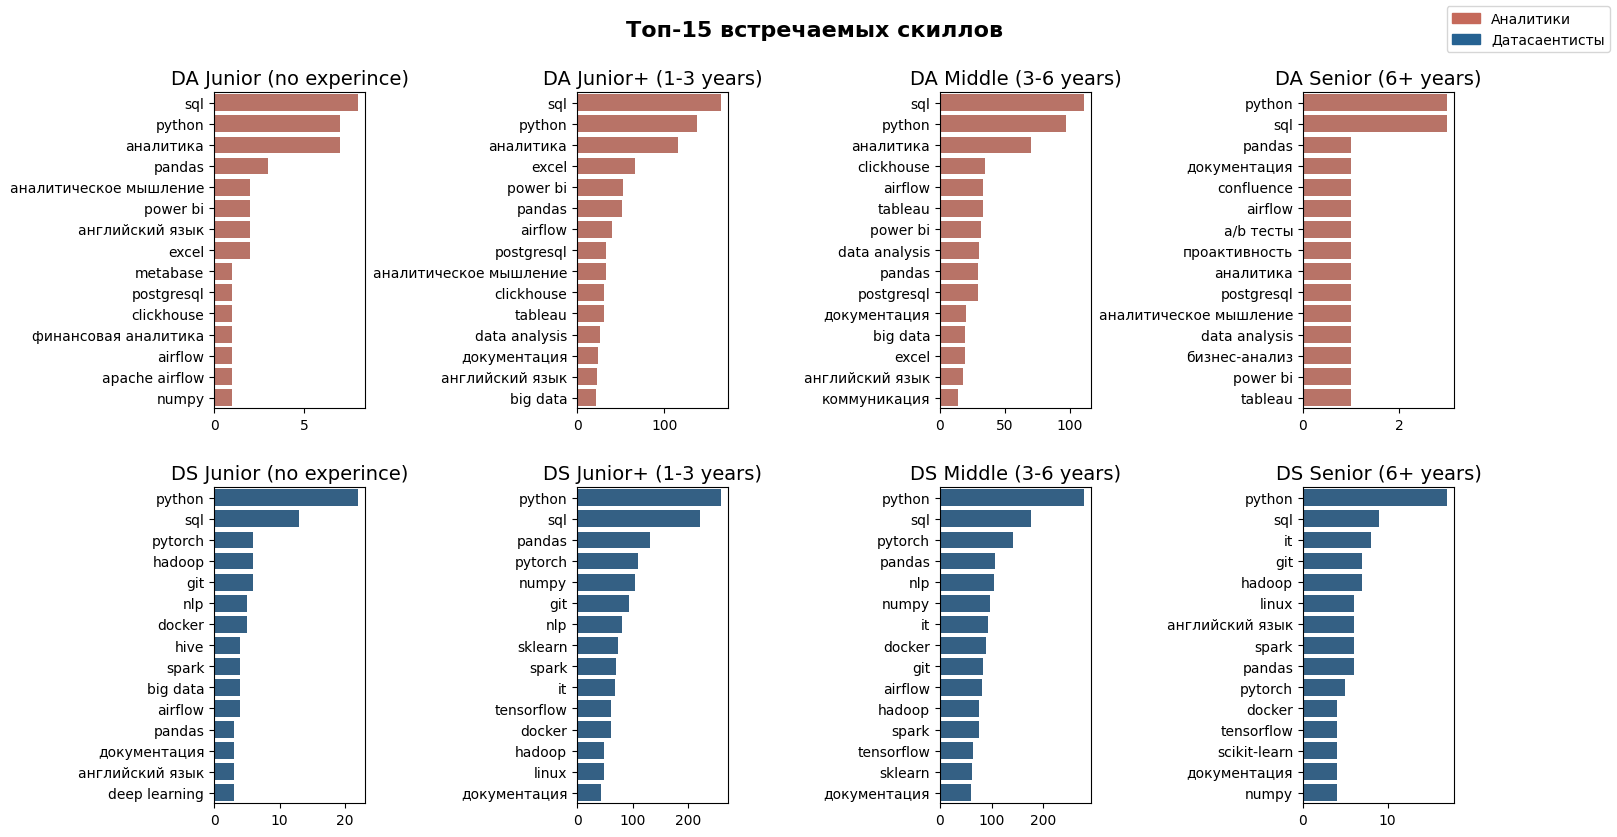

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(16, 9))
fig.suptitle('Топ-15 встречаемых скиллов', fontsize=16, fontweight='bold')

grades = ("Junior (no experince)",
          "Junior+ (1-3 years)",
          "Middle (3-6 years)",
          "Senior (6+ years)")

#создаем столбчатые диаграммы для каждого уровня опыта
for i, name_experience in enumerate(grades):
    freq_skills_da = get_frequency_skill(name_experience)
    freq_skills_ds = get_frequency_skill_ds(name_experience)

    # Аналитики
    sns.barplot(x='Частота встречаемости', y='Скилл', data=freq_skills_da,
                color = '#c5695a', ax=axes[0, i]
                )
    axes[0, i].set_title(f"DA {name_experience}", fontsize=14)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('')

    # Датасаентисты
    sns.barplot(x='Частота встречаемости', y='Скилл', data=freq_skills_ds,
                color = '#266292', ax=axes[1, i]
                )
    axes[1, i].set_title(f"DS {name_experience}", fontsize=14)
    axes[1, i].set_xlabel('')
    axes[1, i].set_ylabel('')

plt.subplots_adjust(wspace=1.4, hspace=0.25, top=0.9)
analyst_patch = mpatches.Patch(color='#c5695a', label='Аналитики')
datascience_patch = mpatches.Patch(color='#266292', label='Датасаентисты')
fig.legend(handles=[analyst_patch, datascience_patch], loc='upper right')
plt.show()

Среди всех грейдов самыми важными скиллами являются Python и SQL. С ростом опыта у аналитиков больше ценятся bi инструменты, ClickHouse и владение ETL процессами и инструментами, включая Airflow. Для аналитиков на всех уровнях, кроме Senior, важен навык работы с Excel, тогда как для более опытных аналитиков этот инструмент уже не является приоритетным.

Для Data Scientist'ов выделяются требованиями к специализированным навыкам в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью таких инструментов, как Docker и Spark. Кроме того, для специалистов Data Science на всех уровнях необходимо знание системы контроля версий Git.



## 5 Определение типичного места работы

### 5.1 ТОП-работодателей

Посмотрим на топ-10 работодателей среди DA и DS:

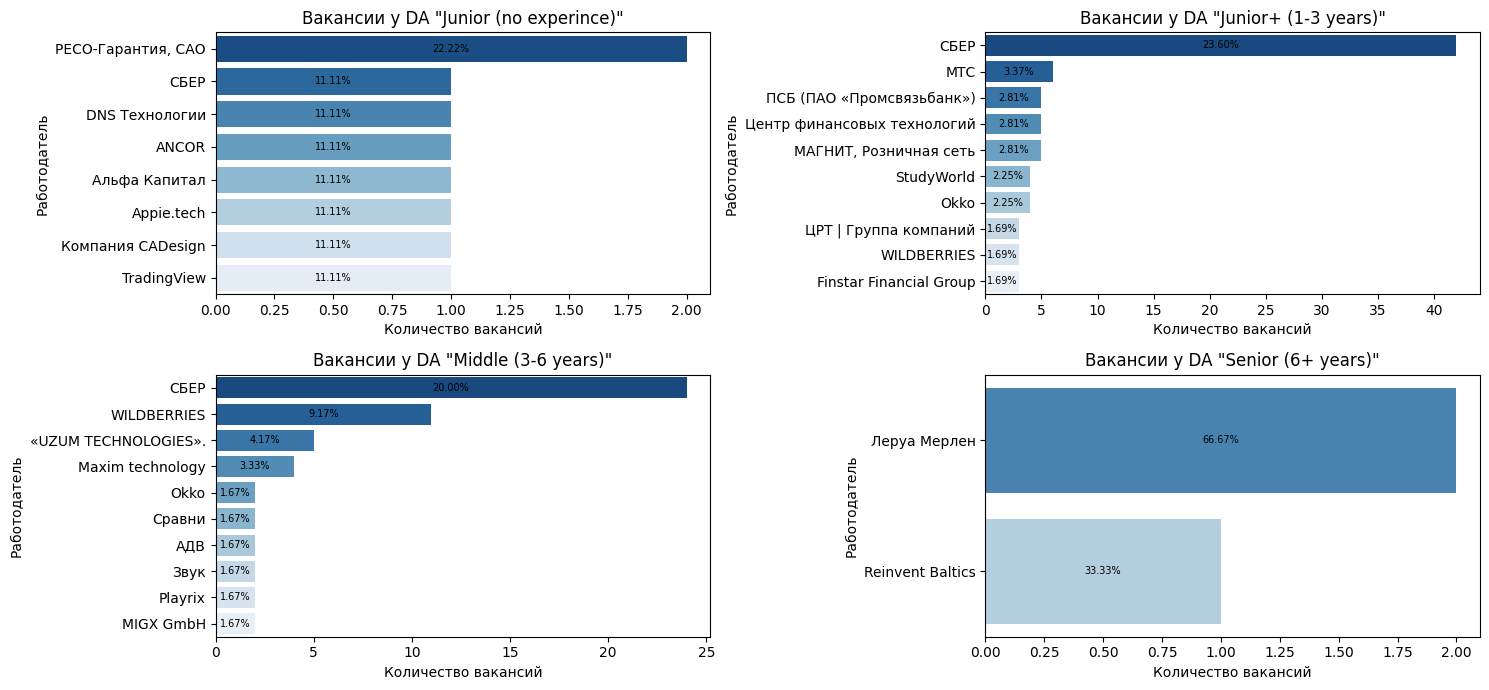

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 7))

#данные для каждого графика
experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)","Senior (6+ years)"]
for i, exp in enumerate(experiences):
    data_subset = data_da[data_da['experience'] == exp]
    top_employers = data_subset['employer'].value_counts().nlargest(10).index
    data_subset = data_subset[data_subset['employer'].isin(top_employers)]

    sns.countplot(
        y='employer', data=data_subset, order=data_subset['employer'].value_counts().index, ax=axes[i//2, i%2], palette='Blues_r'
        )
    #подписи осей
    axes[i//2, i%2].set_xlabel('Количество вакансий')
    axes[i//2, i%2].set_ylabel('Работодатель')

    #добавляем проценты от общего числа внутри грейда
    total_count = len(data_da[data_da['experience'] == exp])
    for patch in axes[i//2, i%2].patches:
        percentage = 100 * patch.get_width() / total_count
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() / 2
        axes[i//2, i%2].text(
            x, y, f'{percentage:.2f}%', fontsize=7, va='center', ha='center', color='black')


    axes[i//2, i%2].set_title(f'Вакансии у DA "{exp}"')

plt.tight_layout()
plt.show()

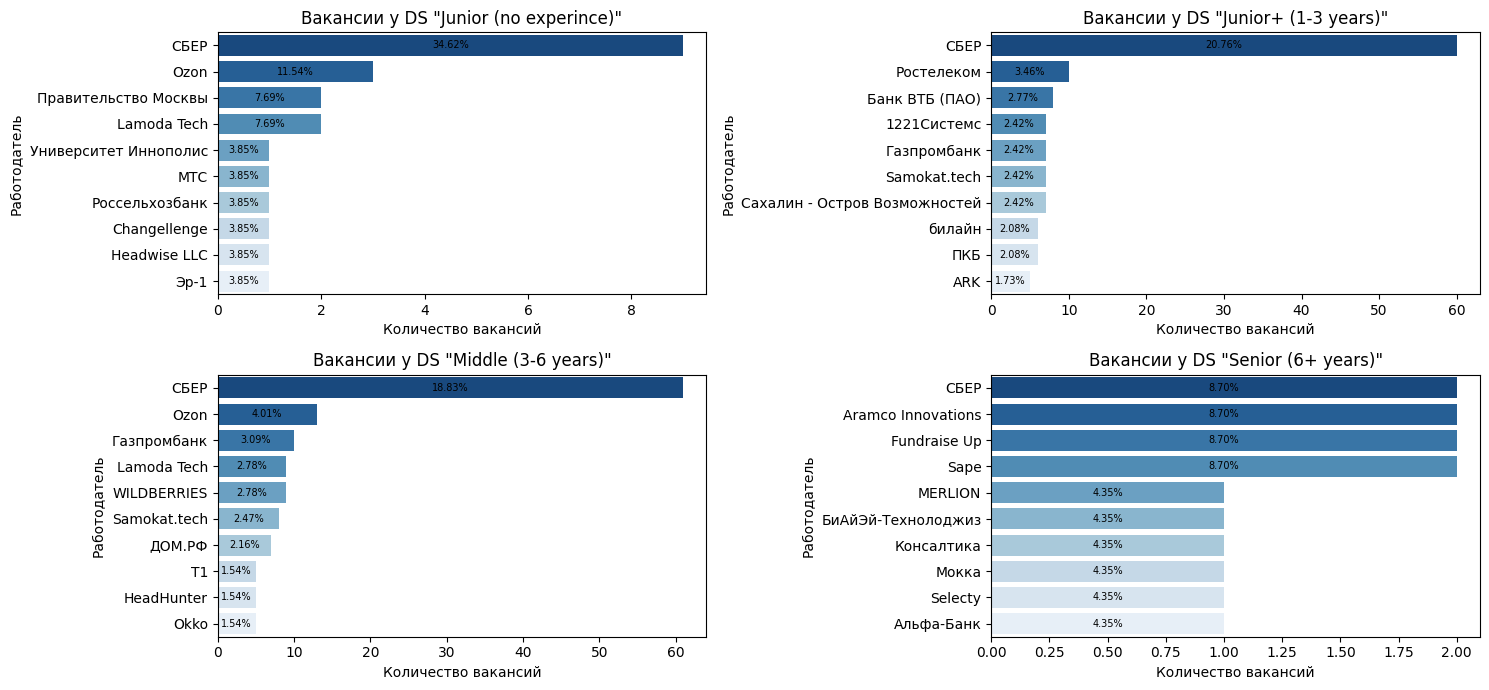

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(15, 7))

#данные для каждого графика
experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)","Senior (6+ years)"]
for i, exp in enumerate(experiences):
    data_subset = data_ds[data_ds['experience'] == exp]
    top_employers = data_subset['employer'].value_counts().nlargest(10).index
    data_subset = data_subset[data_subset['employer'].isin(top_employers)]

    sns.countplot(
        y='employer', data=data_subset, order=data_subset['employer'].value_counts().index, ax=axes[i//2, i%2], palette='Blues_r')

    #подписи осей
    axes[i//2, i%2].set_xlabel('Количество вакансий')
    axes[i//2, i%2].set_ylabel('Работодатель')

    #добавляем проценты от общего числа внутри грейда
    total_count = len(data_ds[data_ds['experience'] == exp])
    for patch in axes[i//2, i%2].patches:
        percentage = 100 * patch.get_width() / total_count
        x = patch.get_x() + patch.get_width() / 2
        y = patch.get_y() + patch.get_height() / 2
        axes[i//2, i%2].text(
            x, y, f'{percentage:.2f}%', fontsize=7, va='center', ha='center', color='black'
            )

    axes[i//2, i%2].set_title(f'Вакансии у DS "{exp}"')

plt.tight_layout()
plt.show()

Почти везде в топах СБЕР (финтех) и маркетплейсы. Две области, которые пытаются разваться вопреки всему.

### 5.2 Тип занятости

Аналитики:

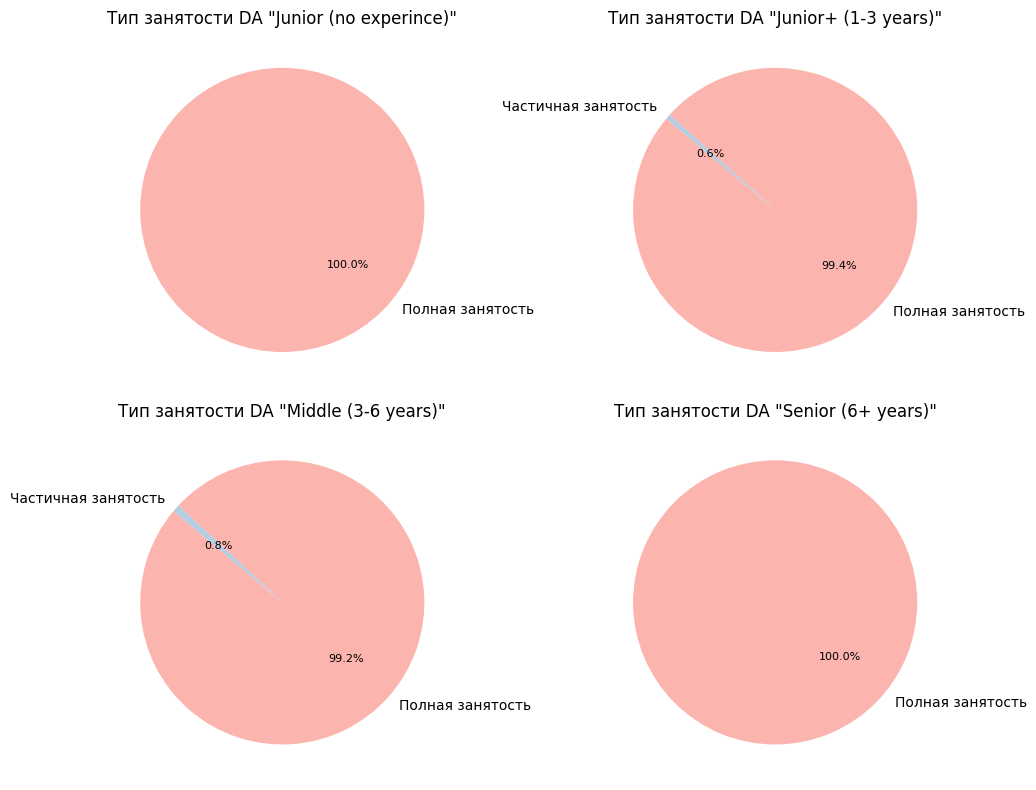

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#список уровней опыта
experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset = data_da[data_da['experience'] == exp]

    #подсчет количества вакансий по типу занятости
    employment_counts = data_subset['employment'].value_counts()

    #строим круговую диаграмму
    wedges, texts, autotexts = axes[i//2, i%2].pie(
        employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

    #подписи к осям
    axes[i//2, i%2].set_title(f'Тип занятости DA "{exp}"')

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

Data Scientist'ы:

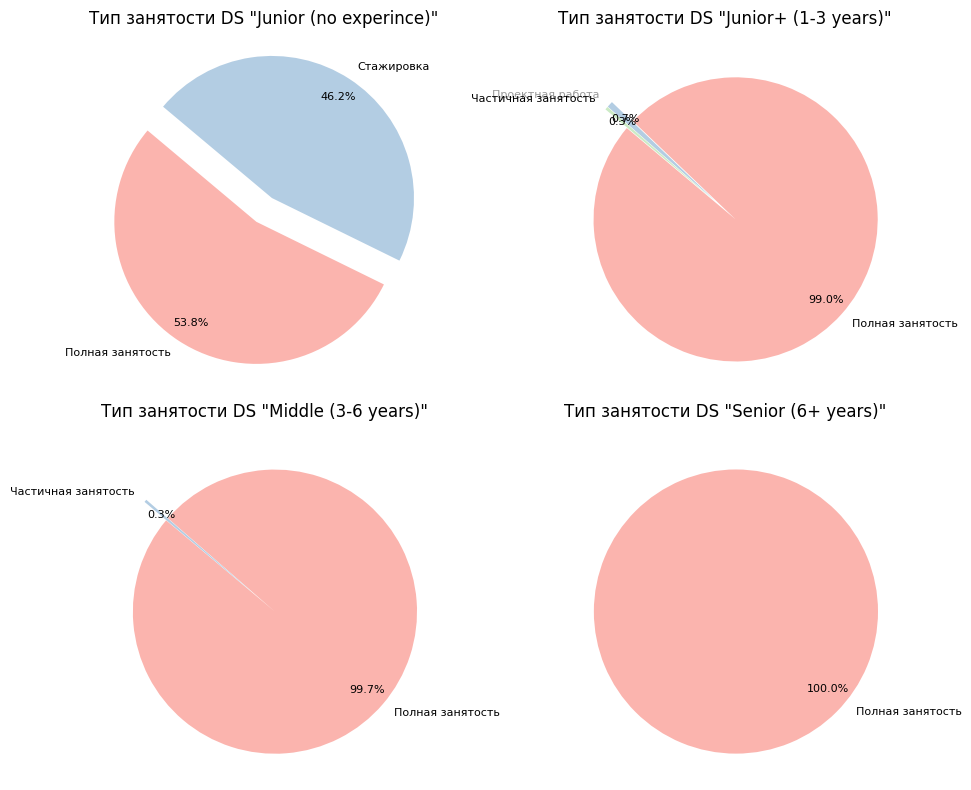

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#список уровней опыта
experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset_ds = data_ds[data_ds['experience'] == exp]

    #подсчет количества вакансий по типу занятости
    employment_counts_ds = data_subset_ds['employment'].value_counts()

    explode = [0.1] * len(employment_counts_ds)

    #строим круговую диаграмму
    wedges, texts, autotexts = axes[i // 2, i % 2].pie(
        employment_counts_ds, labels=employment_counts_ds.index, autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, pctdistance=0.85, labeldistance=1.1
    )

    #подписи к осям
    axes[i // 2, i % 2].set_title(f'Тип занятости DS "{exp}"')

    for text in texts:
        text.set_fontsize(8)
        text.set_color('black')
        text.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='none'))

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

Работодатели ищут сотрудников аналитиков на полный день, среди Data Scientist для соискателей без опыта есть предложения со стажировкой.

### 5.3 Режим работы

Оценим режимы работы предложенные в вакансиях:

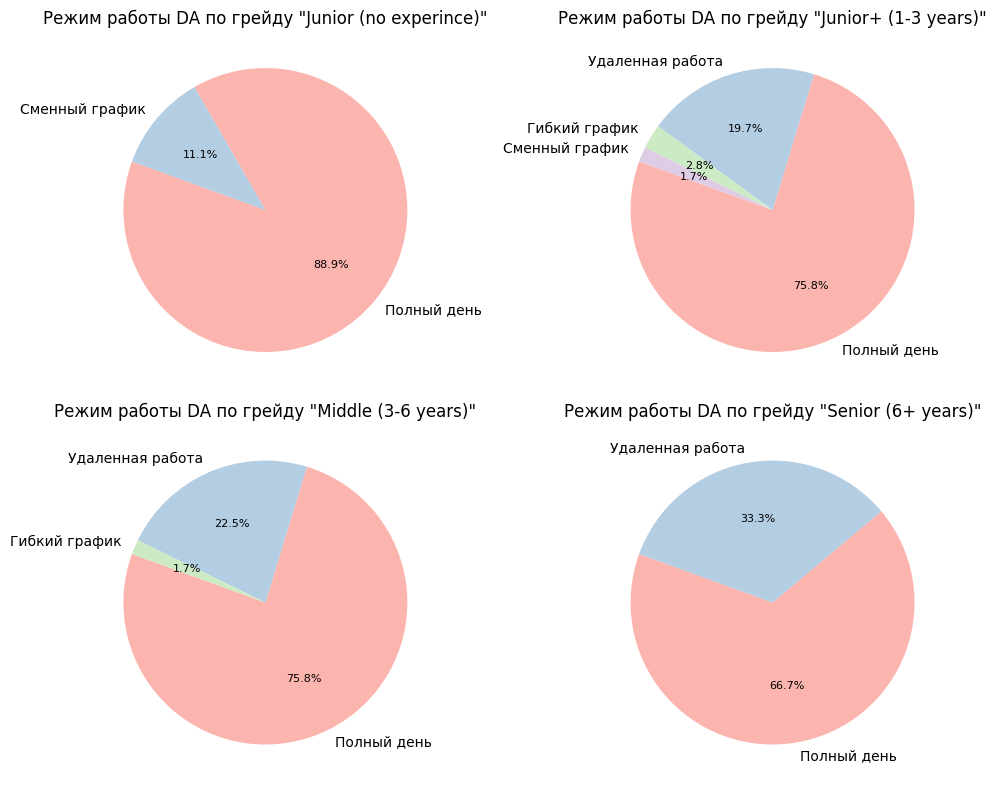

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset = data_da[data_da['experience'] == exp]

    #подсчитываем количество вакансий по типу занятости
    schedule_counts = data_subset['schedule'].value_counts()

    #строим круговую диаграмму
    wedges, texts, autotexts = axes[i//2, i%2].pie(
        schedule_counts, labels=schedule_counts.index, autopct='%1.1f%%', startangle=160, colors=colors)

    #добавляем подписи к осям
    axes[i//2, i%2].set_title(f'Режим работы DA по грейду "{exp}"')

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

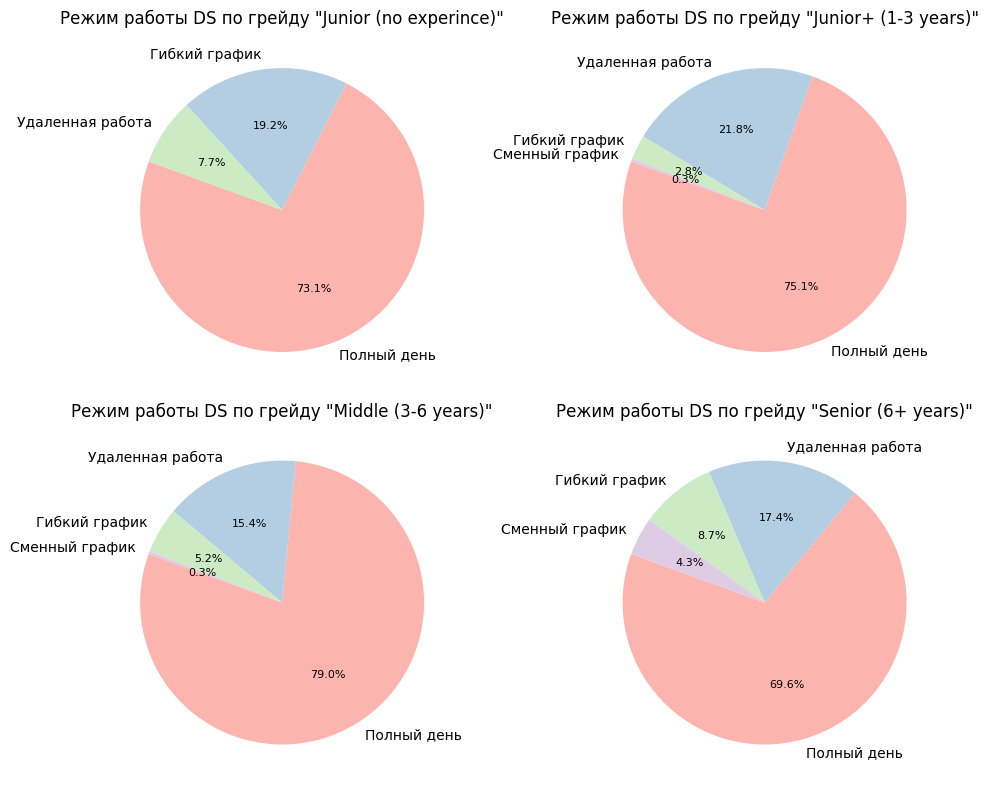

In [ ]:
# Создаем фигуру и подграфики
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Список уровней опыта
experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

# Используем палитру Pastel1 для светлых цветов
colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset_ds = data_ds[data_ds['experience'] == exp]

    # Подсчитываем количество вакансий по типу занятости
    schedule_counts = data_subset_ds['schedule'].value_counts()

    # Строим круговую диаграмму на соответствующем подграфике
    wedges, texts, autotexts = axes[i//2, i%2].pie(
        schedule_counts, labels=schedule_counts.index, autopct='%1.1f%%', startangle=160, colors=colors)

    # Добавляем подписи к осям
    axes[i//2, i%2].set_title(f'Режим работы DS по грейду "{exp}"')

    # Настраиваем стиль подписей
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

# Регулируем расстояние между графиками
plt.tight_layout()
plt.show()

Большая часть вакансий предусматривает полный день, но возможны варианты с удаленной работой. Будучи опытным сотрудником, можно работать по гибкому график.

### 5.4 Зарплата

Посмотрим на распределение по зарплате среди грейдов:

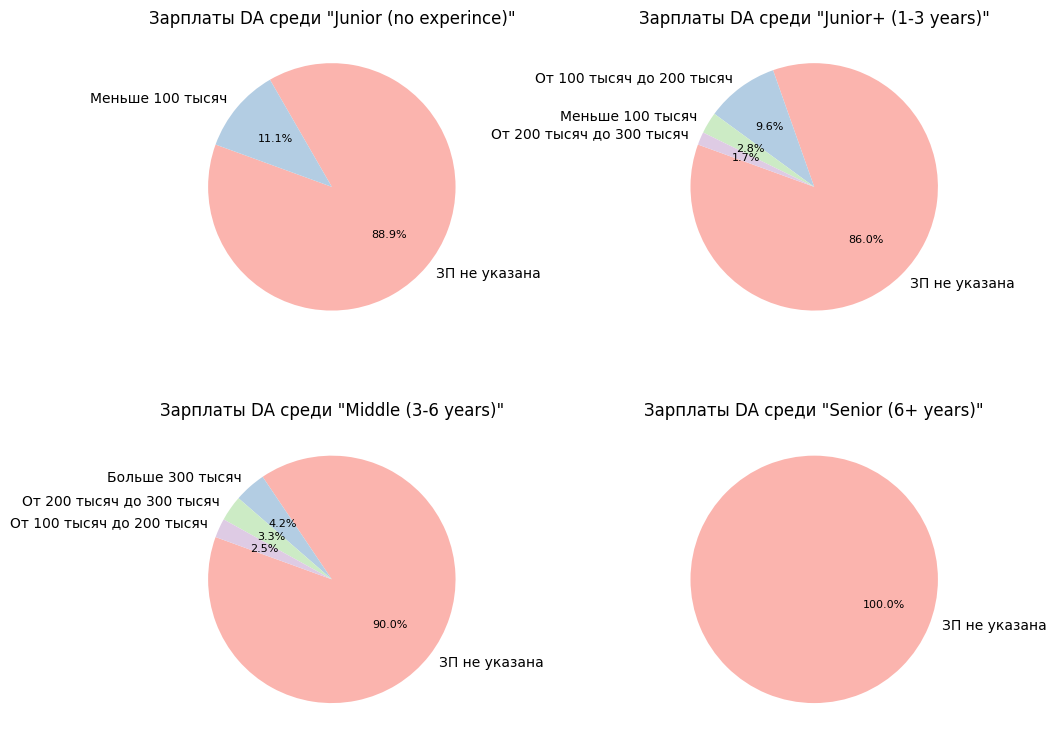

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset = data_da[data_da['experience'] == exp]

    #подсчитываем количество вакансий по типу занятости
    schedule_counts = data_subset['salary_bin'].value_counts()

    #строим круговую диаграмму
    wedges, texts, autotexts = axes[i//2, i%2].pie(
        schedule_counts, labels=schedule_counts.index, autopct='%1.1f%%', startangle=160, colors=colors)

    #добавляем подписи к осям
    axes[i//2, i%2].set_title(f'Зарплаты DA среди "{exp}"')

    #настраиваем стиль подписей
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

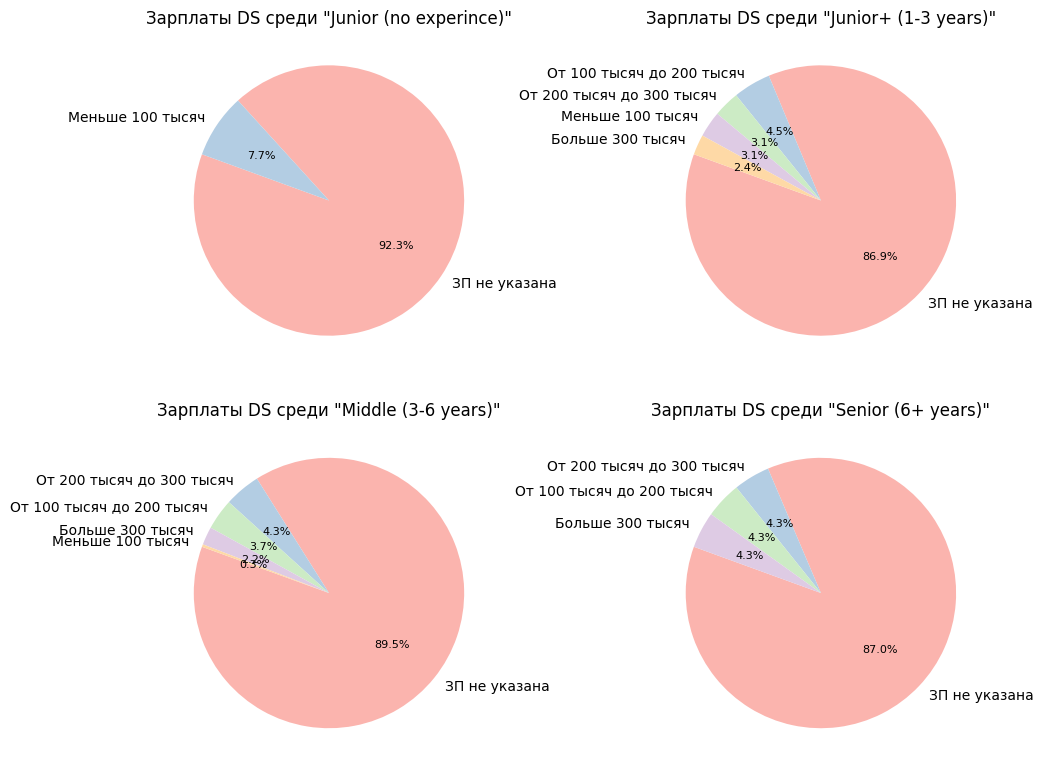

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

experiences = ["Junior (no experince)", "Junior+ (1-3 years)", "Middle (3-6 years)", "Senior (6+ years)"]

colors = sns.color_palette('Pastel1')

for i, exp in enumerate(experiences):
    data_subset_ds = data_ds[data_ds['experience'] == exp]

    #подсчитываем количество вакансий по типу занятости
    schedule_counts_ds = data_subset_ds['salary_bin'].value_counts()

    #строим круговую диаграмму
    wedges, texts, autotexts = axes[i//2, i%2].pie(
        schedule_counts_ds, labels=schedule_counts_ds.index, autopct='%1.1f%%', startangle=160, colors=colors)

    #добавляем подписи к осям
    axes[i//2, i%2].set_title(f'Зарплаты DS среди "{exp}"')

    #настраиваем стиль подписей
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(8)

plt.tight_layout()
plt.show()

Большинство работодателей не указывают зарплату в вакансиях. Думаю, они предпочитают обговаривать данный аспект индивидуально с каждым соискателем. Впрочем, можно судить, что начинающим специалистам стоит ожидать ЗП не превышающую 100 т.руб.

## 6 Динамика количества вакансий

Рассмотрим динамику публикаций вакансий по каждому грейду:

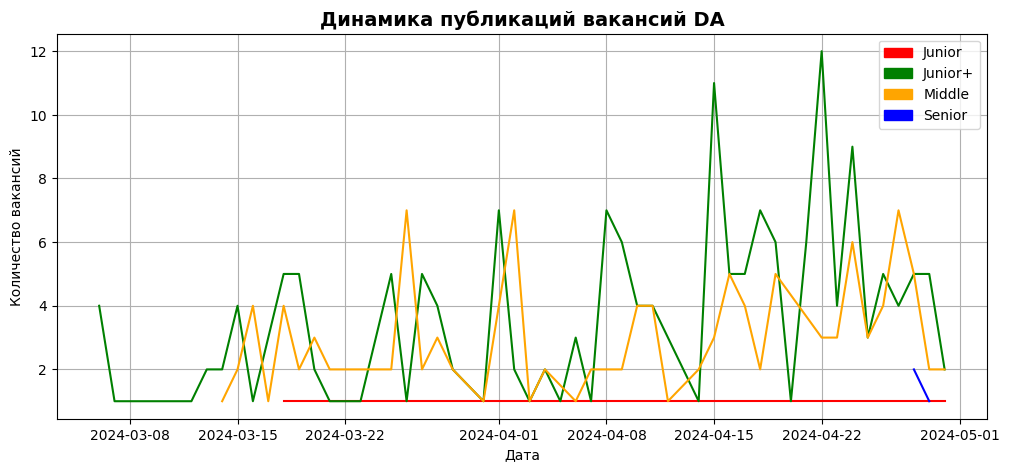

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

df = data_da.groupby(['experience', 'published_date'], as_index=False).id.count()

# отрисовываем графики
sns.lineplot(df[df.experience == 'Junior (no experince)'], x='published_date', y='id', color='red', ax=ax)
sns.lineplot(df[df.experience == 'Junior+ (1-3 years)'], x='published_date', y='id', color='green', ax=ax)
sns.lineplot(df[df.experience == 'Middle (3-6 years)'], x='published_date', y='id', color='orange', ax=ax)
sns.lineplot(df[df.experience == 'Senior (6+ years)'], x='published_date', y='id', color='blue', ax=ax)
plt.grid(True)

#добавляем названия
plt.title('Динамика публикаций вакансий DA', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')

#добавляем легенду
jpatch = mpatches.Patch(color='red', label='Junior')
jppatch = mpatches.Patch(color='green', label='Junior+')
mpatch = mpatches.Patch(color='orange', label='Middle')
spatch = mpatches.Patch(color='blue', label='Senior')
plt.legend(handles=[jpatch, jppatch, mpatch, spatch])

plt.show()

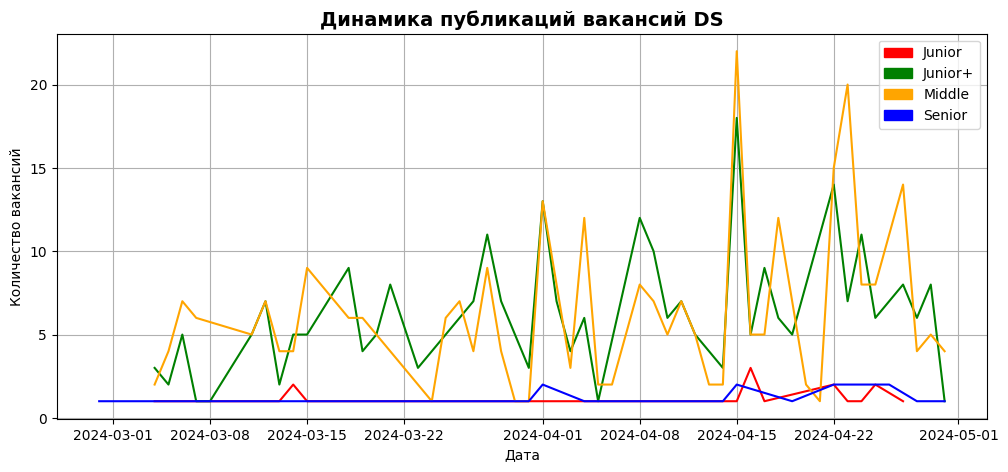

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

df_ds = data_ds.groupby(['experience', 'published_date'], as_index=False).id.count()

# отрисовываем графики
sns.lineplot(df_ds[df_ds.experience == 'Junior (no experince)'], x='published_date', y='id', color='red', ax=ax)
sns.lineplot(df_ds[df_ds.experience == 'Junior+ (1-3 years)'], x='published_date', y='id', color='green', ax=ax)
sns.lineplot(df_ds[df_ds.experience == 'Middle (3-6 years)'], x='published_date', y='id', color='orange', ax=ax)
sns.lineplot(df_ds[df_ds.experience == 'Senior (6+ years)'], x='published_date', y='id', color='blue', ax=ax)
plt.grid(True)

#добавляем названия
plt.title('Динамика публикаций вакансий DS', fontsize=14, fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Количество вакансий')

#добавляем легенду
jpatch = mpatches.Patch(color='red', label='Junior')
jppatch = mpatches.Patch(color='green', label='Junior+')
mpatch = mpatches.Patch(color='orange', label='Middle')
spatch = mpatches.Patch(color='blue', label='Senior')
plt.legend(handles=[jpatch, jppatch, mpatch, spatch])

plt.show()

Видим стабильные публикации вакансий, примерно раз в неделю, для специалистов уровня Junior+ (1-3 years) и Middle (3-6 years) для обоих напралений.

## 7 Выводы и рекомендации

По результатаи исследования можно сделать следующие выводы:
- аналитики данных и специлисты по Data Science примерно равно востребованы на рынке труда. Спрос на специалистов уровня Junior+ особенно высок среди аналитиков, тогда как для датасаентистов преобладают позиции Junior+ и Middle. Это говорит о различиях в требованиях к уровню опыта в зависимости от специализации;
- финтех (СБЕР) и маркетплейсы (OZON) выделяются как основные работодатели в сфере аналитики данных, предлагая множество вакансий для начинающих специалистов. Компании ищут новые кадры, что свидетельствует об интересе к сфере анализа данных;
- по типу занятости большинство вакансий предлагают полную занятость, за исключением начинающих специалистов, для которых также доступны стажировки и проектная работа. С увеличением опыта растет и доля предложений с возможностью удаленной работы;
- в отношении заработных плат заметен разрыв между ожиданиями аналитиков и датасаентистов. Начинающие аналитики часто сталкиваются с зарплатами ниже 100 тыс. рублей, в то время как датасаентисты на уровне Junior+ и Middle имеют более высокие доходы. Впрочем, важно оговориться, что по зарплатным ожиданиям мы имеем малую выборку.

К "идеальным" кандидатам среди аналитиков можно отнести тех, кто обладает скиллами Python и SQL. С ростом опыта у аналитиков больше ценятся bi инструменты, ClickHouse и владение ETL процессами и инструментами, включая Airflow. Для аналитиков на всех уровнях, кроме Senior, важен навык работы с Excel, тогда как для более опытных аналитиков этот инструмент уже не является приоритетным.

У "идеальных" Data Scientist'ов также хотят видеть знания по Python и SQL, также  выделяются требованиями к специализированным навыкам в области машинного обучения, включая ML, PyTorch и NLP, а также востребованностью таких инструментов, как Docker и Spark. Кроме того, для специалистов Data Science на всех уровнях необходимо знание системы контроля версий Git.

На специальстов уровня Junior+ (1-3 years) и Middle (3-6 years) в обоих напралениях присутствует стабильный спрос (по 6-9 вакансий в неделю).

### Рекомендации:
Студенты курса, как правило не имеют опыта работы аналитиком данных, поэтому прежде всего смотрим на требуемые скиллы к специалистам без опыта работы(junior):
- согласно анализу, Excel является одним из ключевых навыков Аналитика данных, вплоть до Middle специалиста, следует включить в состав курса спринт по этому навыку. Также в этот спринт стоит добавить работу с языком запросов Power Query.- среди bi систем, как показывает исследование, самой популярной среди работодателей является Power Bi, которая не присутствует даже в расширенном курсе;
- среди популярных навыков которые хотят видеть работодатели присутствует библиотека Numpy, а знакомство с ней к сожалению отсутствует в курсе;
- также необходимо добавить обучение с каким-нибудь средством создания презентаций, так как у некоторых коллег возникают проблемы с этим инструмнтом.

Для специалистов Data Science, согласно анализу вакансий и описанию курса можно предложить:
- дополнить или заменить Keras на Pytorch, которая является самой популярной библиотекой для обучения нейронных сетей;
- стоит больше часов распределить на работы с большими текстовыми моделями и моделями компьютерного зрения, судя по ключевым навыкам - это самые востребованные направления в Data Science;
- выделить отдельный спринт для работы с большими данными (Hive, Hadoop, Spark).

## 8 Презентация

https://drive.google.com/file/d/1VNJjgj33gMUdnyeJFWb5x3uaQqem8UaW/view?usp=drive_link